## Creating Grayscale Images

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
img = np.arange(8)
img

array([0, 1, 2, 3, 4, 5, 6, 7])

In [55]:
img = img[np.newaxis,:]
img

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [56]:
img = np.repeat(img, 10, axis=0)
img

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

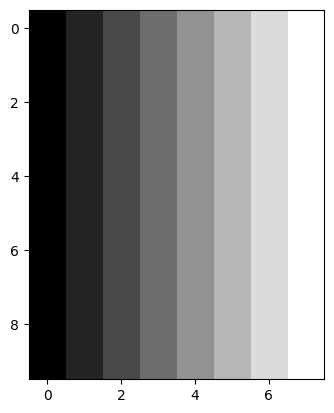

In [57]:
plt.imshow(img, cmap='gray')

## Processing Grayscale Images

In [58]:
ein = plt.imread('./images/einstein.jpeg')

In [59]:
ein.shape

(259, 194, 3)

In [60]:
ein.dtype

dtype('uint8')

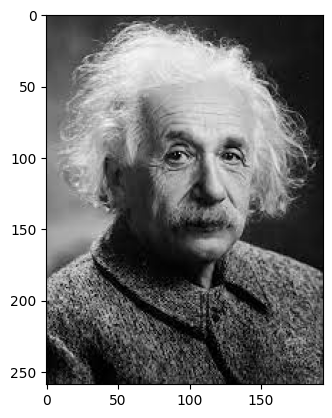

In [61]:
plt.imshow(ein,cmap='gray')

In [62]:
ein

array([[[ 60,  60,  60],
        [ 60,  60,  60],
        [ 59,  59,  59],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[ 61,  61,  61],
        [ 60,  60,  60],
        [ 59,  59,  59],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[ 61,  61,  61],
        [ 61,  61,  61],
        [ 60,  60,  60],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       ...,

       [[ 25,  25,  25],
        [  9,   9,   9],
        [ 34,  34,  34],
        ...,
        [ 93,  93,  93],
        [ 88,  88,  88],
        [ 81,  81,  81]],

       [[ 18,  18,  18],
        [  9,   9,   9],
        [ 40,  40,  40],
        ...,
        [111, 111, 111],
        [ 81,  81,  81],
        [ 75,  75,  75]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 46,  46,  46],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 68,  68,  68]]

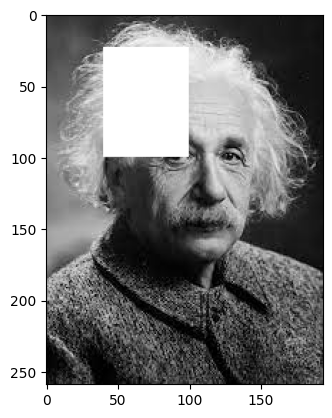

In [63]:
# Changing the value of grayscale to change the image
ein2 = ein.copy()
ein2[23:100,40:100] = 255
plt.imshow(ein2,cmap='gray')

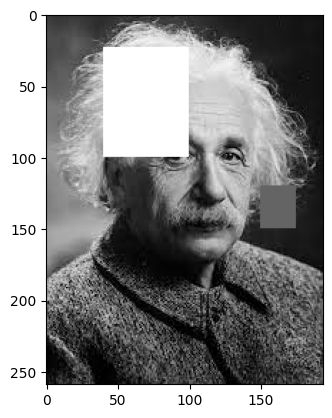

In [64]:
ein2[120:150,150:175] = 100
plt.imshow(ein2,cmap='gray')

In [65]:
# Save the modified image to disk
plt.imsave('./images/mod_einstein.jpeg', ein2, cmap='gray')

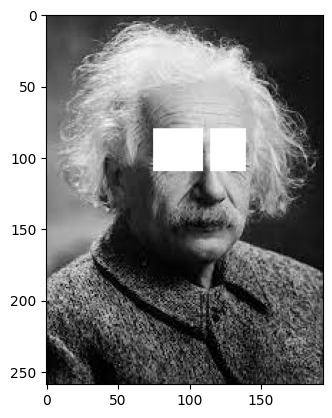

In [66]:
# Quiz: Fill einstein's eye's with white patches
ein_quiz = ein.copy()
ein_quiz[80:110,75:110] = 255
ein_quiz[80:110,115:140] = 255
plt.imshow(ein_quiz, cmap='gray')

## Grayscale with OpenCV

In [67]:
import cv2

In [68]:
img = cv2.imread('./images/einstein.jpeg',cv2.IMREAD_GRAYSCALE)

In [69]:
type(img)

numpy.ndarray

In [72]:
img.dtype

dtype('uint8')

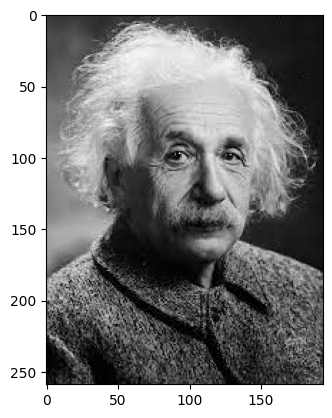

In [73]:
plt.imshow(img,cmap='gray')

In [105]:
# Helper funtion to show an image with cv2
def cv_show_img(title, image, wait=0):
    cv2.namedWindow(title)
    cv2.startWindowThread()
    cv2.imshow(title, image)
    cv2.waitKey(wait)
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

# Helper funtion to show multiple images at the same time
def cv_show_mult_img(titleArr, imageArr, wait=0):
    for i in range(len(titleArr)):
        cv2.namedWindow(titleArr[i])
        cv2.startWindowThread()
        cv2.imshow(titleArr[i], imageArr[i])
    cv2.waitKey(wait)
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [75]:
cv_show_img('Gray',img)

## BGR Images
- For openCV the color channels go by BGR ordering
- For plt the color channels go by RGB ordering

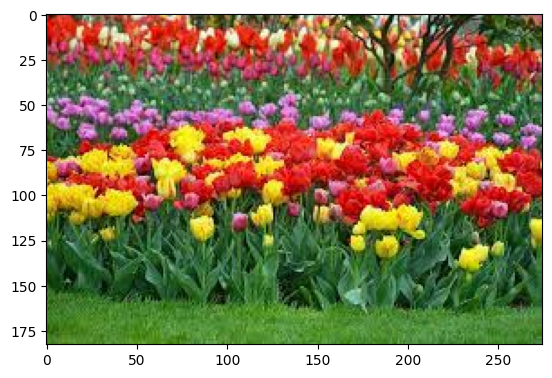

In [76]:
tulips = plt.imread('./images/tulips.jpeg')
plt.imshow(tulips)

In [77]:
tulips.shape

(183, 275, 3)

In [78]:
type(tulips)

numpy.ndarray

In [79]:
tulips.dtype

dtype('uint8')

In [80]:
R = tulips[:,:,0]
G = tulips[:,:,1]
B = tulips[:,:,2]

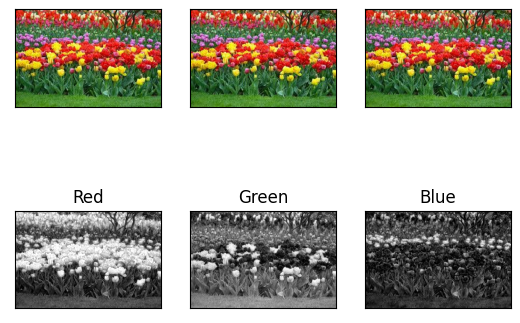

In [85]:
plt.figure(1)
pics = [tulips, tulips, tulips, R, G, B]
titles = ["","","","Red","Green","Blue"]
for i in range(6):

    plt.subplot(230 + i + 1)
    plt.imshow(pics[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show()

## HSV Color Channels & Conversion w/ BGR

In [88]:
# Fonction to Convert RGB --> HSV for one pixel
def rgb_to_hsv(r, g, b, scaleFactor=255):
    # Scale rgb values to 0-255
    r, g, b = r/255.0, g/255.0, b/255.0
    # get the max value, min value, and the difference between them
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    cdiff = cmax - cmin

    # If max == min, all pixels are equal and your Hue value must be 0
    if cmax == cmin:
        h = 0
    # Else - figure out which color channel is the max and figure out where on the color wheel you land
    elif cmax == r:
        h = (60 * ((g - b) / cdiff) + 0) % 360
    elif cmax == g:
        h = (60 * ((b - r) / cdiff) + 120) % 360
    elif cmax == b:
        h = (60 * ((r - g) / cdiff) + 240) % 360
    # Finally check that h is not < 0
    if h < 0:
        h += 360

    # Saturation is a function of the scale factor input and the relative fraction of the different between max & min
    if cmax == 0:
        s = 0
    else:
        s = (cdiff / cmax) * scaleFactor

    # Value/Brightness is a factor of the max RGB value & the scaleFactor
    v = cmax * scaleFactor

    return h, s, v

    

In [89]:
print(rgb_to_hsv(100, 150, 240))

(218.57142857142856, 148.75, 240.0)


In [91]:
# Or you could do it using cv2
tulips = cv2.imread('./images/tulips.jpeg')
tulipsHSV = cv2.cvtColor(tulips,cv2.COLOR_BGR2HSV)
cv_show_img('HSV Tulips',tulipsHSV)

## Extracting Red Tulips from the Image - HSV

In [97]:
# Red colors in HSV are in the 0-30 or 160-180 range of hue values - make a mask for the color red
lower_red = np.array([0,120,70])
upper_red = np.array([15,255,255])

# makes an array of the values that fit in between the HSV values described by lower_red and upper_red
mask_red1 = cv2.inRange(tulipsHSV, lower_red, upper_red)

In [98]:
mask_red1

array([[  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [101]:
# make a second mask for the second range of red values
lower_red = np.array([165,120,70])
upper_red = np.array([180,255,255])

# makes an array of the values that fit in between the HSV values described by lower_red and upper_red
mask_red2 = cv2.inRange(tulipsHSV, lower_red, upper_red)

In [102]:
np.unique(mask_red2)

array([  0, 255], dtype=uint8)

In [104]:
# Bitwise or to get the red mask
mask_red = mask_red1 | mask_red2
mask_red

array([[255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [106]:
# Take the original image and mask it using the bitwise mask we made for the color red
red_tulips = cv2.bitwise_and(tulips,tulips,mask=mask_red)

cv_show_mult_img(['Original','Red Only'],[tulips,red_tulips])

In [115]:
# quiz - extract the yellow flowers instead
# Hue range is 50-60 according to http://www.workwithcolor.com/yellow-color-hue-range-01.htm
# This means the range we need to look for is 25-30 (divided by 2) and then I extended 5 degrees each way for a wider aperture

lower_yellow =  np.array([20,120,70])
upper_yellow =  np.array([35,255,255])
mask_yellow = cv2.inRange(tulipsHSV, lower_yellow, upper_yellow)

In [116]:
np.unique(mask_yellow)

array([  0, 255], dtype=uint8)

In [117]:
yellow_tulips = cv2.bitwise_and(tulips,tulips,mask=mask_yellow)

cv_show_mult_img(['Original','Yellow Only'],[tulips,yellow_tulips])

: 